# 4 aula - Introdução a Probabilidade - Distribuições Discretas e Contínuas

# Primeira Parte da Aula
### Importanto os principais pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from matplotlib.pyplot import figure

## 4.1 Distribuição de Probabilidade Discreta - Jogo de uma Moeda: Cara (1) ou Coroa (0)
### Qual é a probabilidade de sair Cara???

In [3]:
moeda = [0,1]
print("Temos uma moeda com duas faces:",moeda)

Temos uma moeda com duas faces: [0, 1]


In [13]:
def joga_moeda(n):
    """
    Jogue uma moeda n vezes e retorna o resultado em um array
    """
    r = []
    for _ in range(n):
        r.append(random.choice(moeda))
    return np.array(r)

In [ ]:
for _ in range(10):
  print(_)

In [12]:
random.choice([0,1])

1

In [14]:
joga_moeda(1)

array([0])

In [15]:
joga_moeda(2)

array([1, 0])

In [16]:
joga_moeda(4)

array([0, 0, 0, 1])

In [17]:
joga_moeda(100)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [18]:
for i in [1,5,10,50,100,500,1000,5000,10000,20000,30000,40000,50000,500000]:
    print(joga_moeda(i).mean())

0.0
0.6
0.5
0.5
0.48
0.512
0.526
0.4984
0.4977
0.505
0.5034333333333333
0.498
0.5005
0.501268


In [19]:
for i in [1,5,10,50,100,500,1000,5000,10000,20000,30000,40000,50000,500000,1000000]:
    print("Média de {} jogadas de moedas: {}".format(i,round(joga_moeda(i).mean(),2)))

Média de 1 jogadas de moedas: 0.0
Média de 5 jogadas de moedas: 1.0
Média de 10 jogadas de moedas: 0.4
Média de 50 jogadas de moedas: 0.56
Média de 100 jogadas de moedas: 0.52
Média de 500 jogadas de moedas: 0.48
Média de 1000 jogadas de moedas: 0.49
Média de 5000 jogadas de moedas: 0.5
Média de 10000 jogadas de moedas: 0.5
Média de 20000 jogadas de moedas: 0.5
Média de 30000 jogadas de moedas: 0.5
Média de 40000 jogadas de moedas: 0.5
Média de 50000 jogadas de moedas: 0.5
Média de 500000 jogadas de moedas: 0.5
Média de 1000000 jogadas de moedas: 0.5


## 4.2 E se no lugar de uma moeda, fosse jogada um dado com 6 faces.
### Se a média depois de 100 jogadas for 1, 2 ou 3 você ganha. 
### Se for maior que 3 eu ganho, vamos jogar?

In [20]:
dado = [x for x in range(1,7)]
print("Temos um dado com 6 faces:",dado)

Temos um dado com 6 faces: [1, 2, 3, 4, 5, 6]


In [21]:
random.choice(dado)

4

In [22]:
dado = [x for x in range(1,7)]
print("Temos um dado com 6 faces:",dado)

def joga_dados(n):
    """
    Jogue um dado n vezes e retorna o resultado em um array
    """
    r = []
    for _ in range(n):
        r.append(random.choice(dado))
    return np.array(r)

Temos um dado com 6 faces: [1, 2, 3, 4, 5, 6]


In [23]:
joga_dados(1)

array([3])

In [27]:
joga_dados(6).mean()

2.5

In [28]:
for i in [1,2,3,4,5,10,50,100,500,1000,5000,10000,100000,1000000]:
    print("Média de {} lançamentos de dados: {}".format(i,round(joga_dados(i).mean(),2)))

Média de 1 lançamentos de dados: 5.0
Média de 2 lançamentos de dados: 5.0
Média de 3 lançamentos de dados: 3.0
Média de 4 lançamentos de dados: 3.25
Média de 5 lançamentos de dados: 2.8
Média de 10 lançamentos de dados: 3.2
Média de 50 lançamentos de dados: 3.38
Média de 100 lançamentos de dados: 3.64
Média de 500 lançamentos de dados: 3.45
Média de 1000 lançamentos de dados: 3.48
Média de 5000 lançamentos de dados: 3.46
Média de 10000 lançamentos de dados: 3.51
Média de 100000 lançamentos de dados: 3.5
Média de 1000000 lançamentos de dados: 3.5


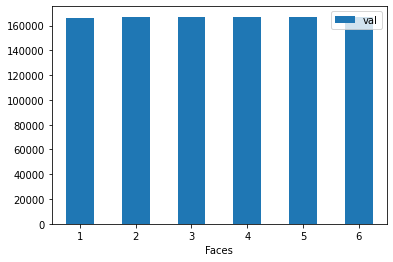

In [30]:
faces_observadas = pd.DataFrame({'Faces':joga_dados(1000000)})

x = faces_observadas['Faces'].value_counts().sort_index().index
y = faces_observadas['Faces'].value_counts().sort_index().values

df = pd.DataFrame({'Faces':x, 'val':y})
df.plot.bar(x='Faces', y='val', rot=0);

## 4.3 Valor Esperado de uma Distribuição de Probabilidade Discreta


__Valor esperado ou média__: a média ponderada dos valores possíveis, usando suas probabilidades como seus pesos; ou o análogo contínuo deste.


Seja $X$ uma variável aleatória com um número finito de resultados finitos $x_1$, $x_2$, $x_3$, ... ocorrendo com probabilidades $p_1$, $p_2$, $p_3$, ... respectivamente. A Experânça de $X$ é, então, definida como:

$$ E[X]=\sum_{i=1}^{k}x_{i}\,p_{i}=x_{1}p_{1}+x_{2}p_{2}+\cdots +x_{k}p_{k} $$

Como todas as probabilidades $p_1$, $p_2$, $p_3$ somam 1, $p_1 + p_2 + p_3 + ... = 1$, é a ** média ponderada **.

Para distribuições de probabilidade contínuas, com uma função de densidade (PDF) de $f(x)$, o valor esperado é dado por,

$$ {\displaystyle \operatorname {E} [X]=\int _{\mathbb {R} }xf(x)\,dx.}$$

In [31]:
print("Final da Primeira Parte da Aula")

Final da Primeira Parte da Aula


# Segunda Parte da Aula

## 4.4 Distribuição de Probabilidade Contínuia - Distribuição Normal

In [ ]:
np.linspace(-10, 30, 100)

In [33]:
mu = 10
sigma_2 = 4

# Criando os valores do eixo x:
x= np.linspace(-10, 30, 100)

def densidade_normal(x):
  return 1/(sigma_2 * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma_2**2) )  

# Calculando os valores do eixo y:
y = densidade_normal(x)

df = pd.DataFrame({"Eixo x":x, "Eixo y":y})
df.head()


,Eixo x,Eixo y
0,-10.000000,3.716799e-07
1,-9.595960,6.127653e-07
2,-9.191919,9.999726e-07
3,-8.787879,1.615292e-06
4,-8.383838,2.582752e-06


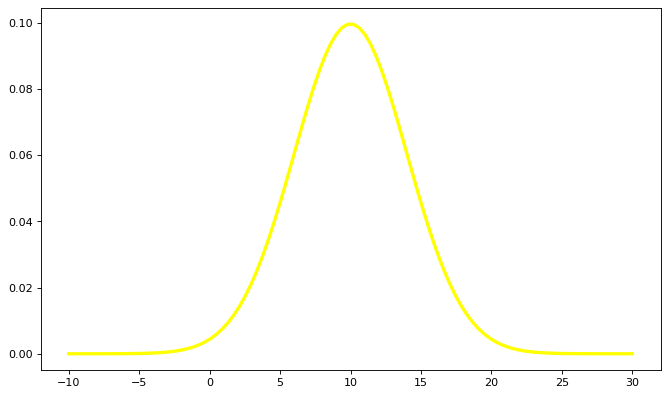

In [34]:
# Plot the distribution curve
figure(figsize=(10, 6), dpi=80);
plt.plot(x,y,linewidth=3, color='yellow')
plt.show()

# Utilizando o pacote scipy.stats
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

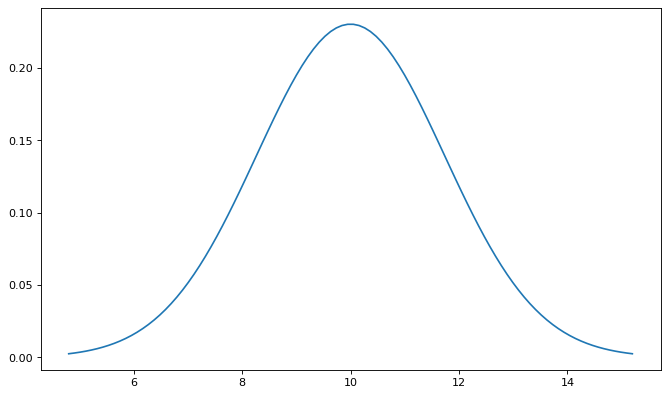

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math


from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80);


mu = 10
variance = 3
sigma = math.sqrt(variance)


x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()



## Exemplo de Sala de Aula
### Seja X uma v.a com distribuição normal, com média 45 e variância 100.
### Calcule a probabilidade de sortiarmos uma valor x que seja menor que 40

Seja $X$ uma v.a. com distribuição $N(45, 100)$. 

1.   Faça o gráfico da função de densidade:
2.   Calcular as probabilidades:

*   $ P[X < 40] $


## Primeiro Passo, fazer o Gráfico da Função de Densidade.

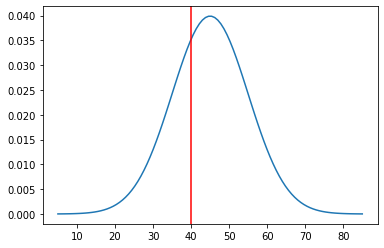

In [38]:
mu = 45
variance = 100
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(x=40, color='r', linestyle='-')
plt.show()

#Segundo Passo, calcular.
*   $ P[X < 40] $

In [39]:
mu = 45
std = np.sqrt(100)

from scipy.stats import norm
norm.cdf(40, loc=45, scale=std)

0.3085375387259869

## Calcular a Função Sobrevivência no ponto $X=40$
*   $ P[X > 40] $

In [40]:
norm.sf(40, loc=45, scale=std)

0.6914624612740131

### Prova dos 9
### A probabilidade de x ser menor do que 40 ou maior que 40 deve ser 1

Calcular a Função de Sobrevicência em $40$, isto é,  P($X \geq 40$)

In [41]:
norm.sf(40, loc=45, scale=std)

0.6914624612740131

## Somar as dias quantidades (tem que somar 1)

In [42]:
norm.cdf(40, loc=45, scale=std) + norm.sf(40, loc=45, scale=std)

1.0

In [43]:
print("Final da Segunda Parte da Aula")

Final da Segunda Parte da Aula


# Terceira Parte da Aula

# Exercícios de Fixação
## Use esse site como referência:

https://docs.scipy.org/doc/scipy/reference/stats.html

1) Seja $X$ uma v.a. com distribuição $N(100, 100)$. 

1.   Faça o gráfico da função de densidade:
2.   Calcular as probabilidades (represente os valores no gráfico (com retas verticais)

*   $ P[X < 95] $
*   $ P[90 < X < 110] $
*   $ P[X > 95] $

2) Para $X \sim N(30, 49)$:

1.   Faça o gráfico da função de densidade:
2.   Calcular as probabilidades (represente os valores no gráfico (com retas verticais)

*    $P(X \leq 5)$
*    $P(X \geq 80)$
*    $P(X \leq 30)$
*    $P(85 \leq X \leq 110)$
*    $P(\vert X - 10\vert \leq 35)$
*    O valor de $a$ tal que $P(30-a \leq X \leq 30+a) =
\gamma, \; \gamma=0.95$

3) Para $X \sim N(0, 1)$, obtenha:

1.   O gráfico da função de densidade:
2.   Calcular as probabilidades (represente os valores no gráfico (com retas verticais)

*    $P(X \leq 2.5)$
*    $P(X \geq 0.5)$
*    $P(X \leq 0)$
*    $P(0 \leq X \leq 3)$
*    $P(\vert X\vert \leq 1)$

4) Seja $X$ uma v.a. com distribuição Binomial com $n=10$ e $p=0.35$. Vamos ver os comandos do Python para:

*   Fazer o gráfico das função de densidade
*   Calcular as probabilidades (represente os valores no gráfico (com retas verticais)
*   calcular $P[X = 7]$
*   calcular $P[X < 8] = P[X \leq 7]$
*   calcular $P[X \geq 8] = P[X > 7]$
*   calcular $P[3 < X \leq 6] = P[4 \leq X < 7]$

In [ ]:
print("FIM!")